In [12]:
using DataFramesMeta

include("src/Spectrum.jl")
include("src/ModeSolutions.jl")

overlap_field (generic function with 1 method)

## 配置参数范围，扫描给定波长范围的基频模式

In [13]:
lambda = [1580, 1600] # 扫谱波长范围 nm
mode = "TE" # 电磁场模式
R = 25 # WGM 半径
n = 1.5 # 折射率
n_num_max = 2 # 扫描最大径向阶数

# 扫谱
data = spectrum(lambda, mode, n_num_max, n, R, Q_factor="open", option="n_num depend");

Finished ✓      100%|███████████████████████████████████| Time: 0:00:24


### 基频模式存入文件

In [5]:
# 扫谱结果存入文件
CSV.write("/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda'nm' n_max=$n_num_max mode=$mode.csv", data)

"/Users/wenzhengliu/Research/temp_data/radius=25 refractive_id=1.5 wavelength=[1580, 1600]'nm' n_max=2 mode=TE.csv"

## 配置参数范围，扫描给定波长范围的倍频模式

In [6]:
lambda_shg = lambda/2 # 倍频光扫谱波长范围 nm
data_shg = spectrum(lambda_shg, mode, n_num_max, n, R, option="all");

Finished ✓      100%|███████████████████████████████████| Time: 1:04:54


### 倍频模式存入文件

In [7]:
# 扫谱结果存入文件
CSV.write("/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda_shg'nm' n_max=$n_num_max mode=$mode.csv", data_shg)

"/Users/wenzhengliu/Research/temp_data/radius=25 refractive_id=1.5 wavelength=[790.0, 800.0]'nm' n_max=2 mode=TE.csv"

## 光谱图

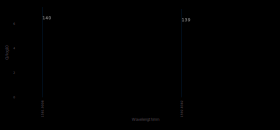

In [14]:
# 显示谱线结果
view_spectrum(lambda, data, 1, view_mode="details")

## 选定某一模式，绘制场分布图

In [20]:
# 作图，给定模式数
n_num, l_num, m_num = 1, 140, 70

lambda_df = @chain data begin
    @rsubset :n == n_num && :l == l_num
    @select(:wav = :wavelength)
end
lambda_select = lambda_df.wav[1]
println(lambda_select)

1581.900821949349


Finished ✓      100%|███████████████████████████████████| Time: 0:04:03


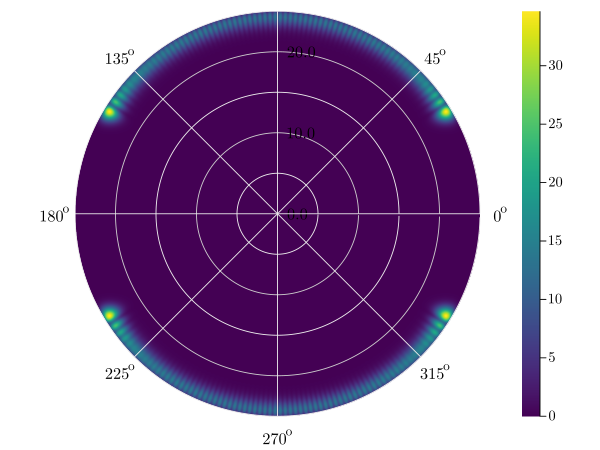

In [21]:
view_field(data, n_num, l_num, m_num, n, R, mode, "E", quality="fine", scale="normal")